continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. Using lemonade.csv dataset and focusing on continuous variables:

    - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
    - Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
    - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
    - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [3]:
df = pd.read_csv('lemonade.csv')

In [4]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
7,1/8/17,Sunday,37.5,1.18,28,0.5,15
8,1/9/17,Monday,38.1,1.18,20,0.5,17
9,1/10/17,Tuesday,43.4,1.05,33,0.5,18


In [5]:
df.shape

(365, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.589041,29.979680,7.0,20.00,25.00,30.00,534.0


In [10]:
df.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

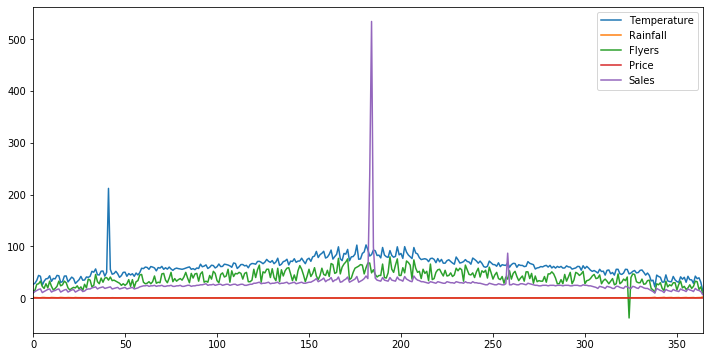

In [13]:
df.plot(figsize=(12,6))

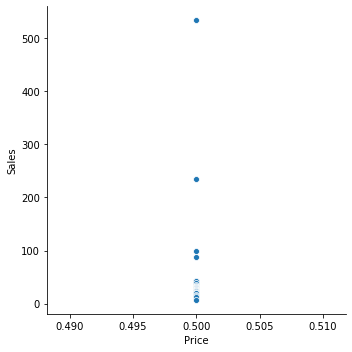

In [25]:
sns.relplot(x='Price', y='Sales', data=df)

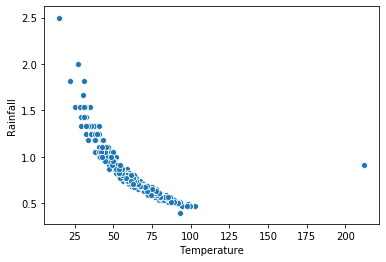

In [41]:
sns.scatterplot(data=df, x='Temperature', y="Rainfall")

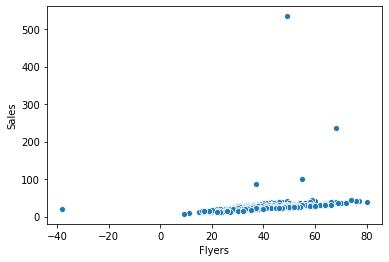

In [42]:
sns.scatterplot(data=df, x='Flyers', y="Sales")

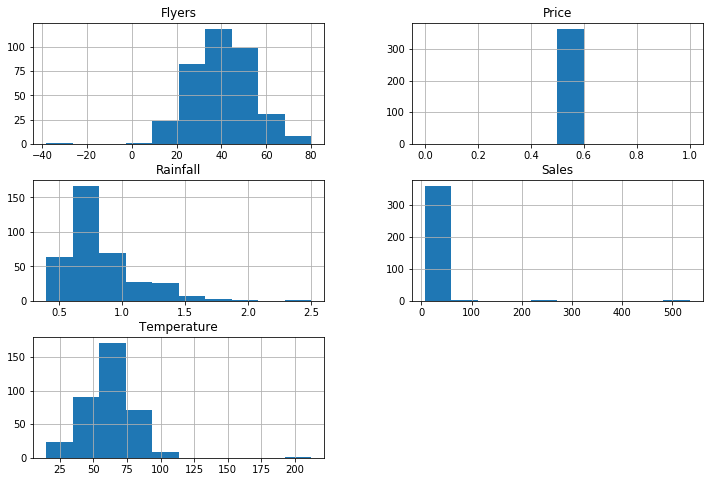

In [47]:
df.hist(figsize=(12,8))
plt.show()

In [53]:
df.sort_values(by='Temperature', ascending=False).head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
181,7/1/17,Saturday,102.9,0.47,59,0.5,43
176,6/26/17,Monday,102.6,0.47,60,0.5,42
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41


In [56]:
df.sort_values(by='Rainfall', ascending=False).head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
15,1/16/17,Monday,30.6,1.67,24,0.5,12


Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [ ]:
df1 = df['Temperature']

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

    - Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columsn from lemonade.csv